In [1]:
%matplotlib inline

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import scipy.stats as stats

# Titanic  Datasets

## Absract
#### This notebook will show that there is a relation between passenger survived and their financial ability

### Load data and initial explanation

In [107]:
### import data sets this data sets are donwloded from kaggle.com
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")
combine = pd.concat([train.drop('Survived',1),test])


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

 #### Columns description
#### $\bullet$ Pclass is the Ticket-class: first (1), second (2), and third (3) class tickets were used. This is an ordinal integer feature.

#### $\bullet$ Name is the name of the passenger. The names also contain titles and some persons might share the same surname; indicating family relations. We know that some titles can indicate a certain age group. For instance Master is a boy while Mr is a man. This feature is a character string of variable length but similar format.

#### $\bullet$ Sex is an indicator whether the passenger was female or male. This is a categorical text string feature.

#### $\bullet$ Age is the integer age of the passenger. There are NaN values in this column.

#### $\bullet$ SibSp is another ordinal integer feature describing the number of siblings or spouses travelling with each passenger.

#### $\bullet$ Parch is another ordinal integer features that gives the number of parents or children travelling with each passenger.

#### $\bullet$ Ticket is a character string of variable length that gives the ticket number.

#### $\bullet$ Fare is a float feature showing how much each passenger paid for their rather memorable journey.

#### $\bullet$ Cabin gives the cabin number of each passenger. There are NaN in this column. This is another string feature.

#### $\bullet$ Embarked shows the port of embarkation as a categorical character value.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In summary we have 1 floating point feature (Fare), 1 integer variable (Age), 3 ordinal integer features (Plcass, SibSp, Parch), 2 categorical text features (Sex, Embarked), and 3 text string features (Ticket, Cabin, Name).

### data cleaning

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### from above table we can notice for the mising values ,because there are difference value on index count

In [119]:
print(train.isnull().sum())
print(test.info())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


#### we notice
#### $\bullet$ In the training data a large majority of Cabin numbers are missing, together with 177 Age values and 2 Embarked values.

#### $\bullet$ Also, in the test data there is one Fare missing (cheeky selection), almost 100 Age values are unknown, and only 91 Cabin numbers were preserved. Best to keep that in mind.

### Dealing with missing data



In [109]:
# Let's write a functin to print the total percentage of the missing values.
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent']) ##concat by adding column


In [110]:
missing_percentage(train)

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [111]:
missing_percentage(test)

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


#### We see that in both train, and test dataset have missing values. Let's make an effort to fill these missing values starting with "Embarked" feature.

In [112]:
def percent_value_counts(df, feature):
    """This function takes in a dataframe and a column and finds the percentage of the value_counts"""
    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    ## creating a df with th
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))
    ## concating percent and total dataframe

    total.columns = ["Total"]
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis = 1)

In [113]:
percent_value_counts(train, 'Embarked')

,Total,Percent
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


#### Let's see what are those two null values

In [114]:
train[train.Embarked.isnull()] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


#### We may be able to solve these two missing values by looking at other independent variables of the two raws. Both passengers paid a fare of $80, are of Pclass 1 and female Sex. Let's see how the Fare is distributed among all Pclass and Embarked feature values

/home/daodeiv/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


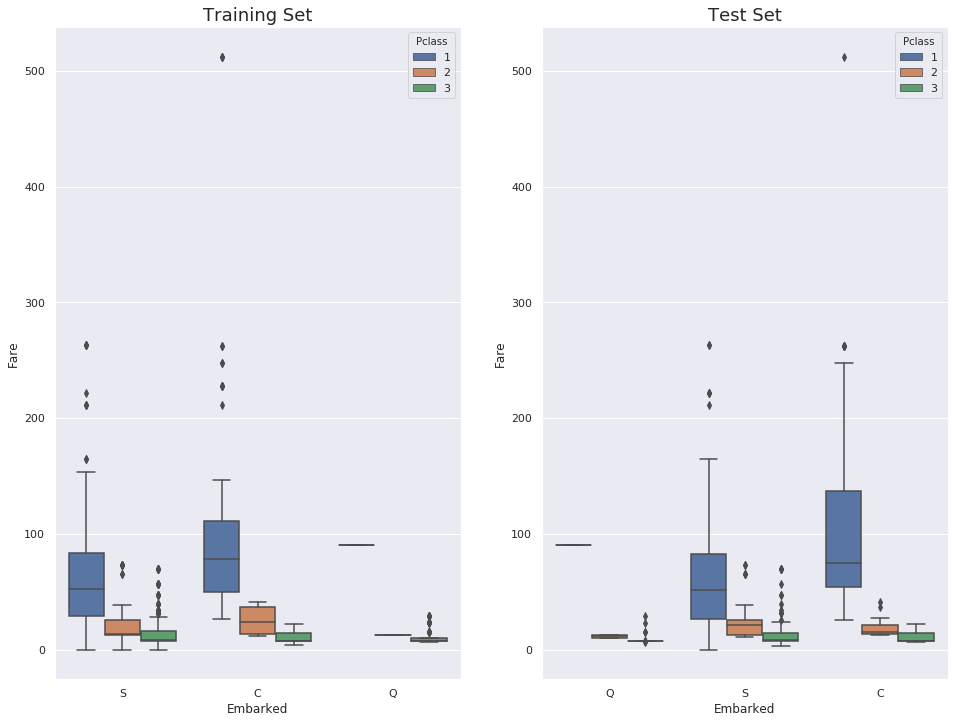

In [115]:

fig, ax = plt.subplots(figsize=(16,12),ncols=2)
ax1 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train, ax = ax[0]);
ax2 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=test, ax = ax[1]);
ax1.set_title("Training Set", fontsize = 18)
ax2.set_title('Test Set',  fontsize = 18)
fig.show()

#### Here, in both training set and test set, the average fare closest to $80 are in the C Embarked values. So, let's fill in the missing values as "C"

In [116]:
train.Embarked.fillna("C", inplace=True)

#### Cabin Feature


In [117]:

print("Train Cabin missing: " + str(train.Cabin.isnull().sum()/len(train.Cabin)))
print("Test Cabin missing: " + str(test.Cabin.isnull().sum()/len(test.Cabin)))

Train Cabin missing: 0.7710437710437711
Test Cabin missing: 0.7822966507177034


Approximately 77% of Cabin feature is missing in the training data and 78% missing on the test data. We have two choices,

we can either get rid of the whole feature, or
we can brainstorm a little and find an appropriate way to put them in use. For example, We may say passengers with cabin record had a higher socio-economic-status then others. We may also say passengers with cabin record were more likely to be taken into consideration when loading into the boat.
Let's combine train and test data first and for now, will assign all the null values as "N"

All the cabin names start with an English alphabet following by multiple digits. It seems like there are some passengers that had booked multiple cabin rooms in their name. This is because many of them travelled with family. However, they all seem to book under the same letter followed by different numbers. It seems like there is a significance with the letters rather than the numbers. Therefore, we can group these cabins according to the letter of the cabin name.

In [19]:
#### let's combine train and test data first and for now, will assign all the null values as "N"
## Concat train and test into a variable "all_data"
survivers = train.Survived

train.drop(["Survived"],axis=1, inplace=True)

all_data = pd.concat([train,test], ignore_index=False)

## Assign all the null values to N
all_data.Cabin.fillna("N", inplace=True)

## Separating train and test from all_data. 
train = all_data[:891]

test = all_data[891:]

# adding saved target variable with train. 
train['Survived'] = survivers

/home/daodeiv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


All the cabin names start with an English alphabet following by multiple digits. It seems like there are some passengers that had booked multiple cabin rooms in their name. This is because many of them travelled with family. However, they all seem to book under the same letter followed by different numbers. It seems like there is a significance with the letters rather than the numbers. Therefore, we can group these cabins according to the letter of the cabin name.

In [20]:
all_data.Cabin = [i[0] for i in all_data.Cabin]

#### Now let's look at the value counts of the cabin features and see how it looks.

In [21]:
percent_value_counts(all_data, "Cabin")

,Total,Percent
N,1014,77.46
C,94,7.18
B,65,4.97
D,46,3.51
E,41,3.13
A,22,1.68
F,21,1.60
G,5,0.38
T,1,0.08


#### So, We still haven't done any effective work to replace the null values. Let's stop for a second here and think through how we can take advantage of some of the other features here.

#### We can use the average of the fare column We can use pythons groupby function to get the mean fare of each cabin letter.

In [22]:
all_data.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [23]:

with_N = all_data[all_data.Cabin == "N"]

without_N = all_data[all_data.Cabin != "N"]

all_data.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

#### Now, these means can help us determine the unknown cabins, if we compare each unknown cabin rows with the given mean's above. Let's write a simple function so that we can give cabin names based on the means.

In [24]:
def cabin_estimator(i):
    """Grouping cabin feature by the first letter"""
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "E"
    elif i>= 53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = 'C'
    else:
        a = "B"
    return a
    

Let's apply cabin_estimator function in each unknown cabins(cabin with null values). Once that is done we will separate our train and test to continue towards machine learning modeling.

In [25]:
##applying cabin estimator function. 
with_N['Cabin'] = with_N.Fare.apply(lambda x: cabin_estimator(x))

## getting back train. 
all_data = pd.concat([with_N, without_N], axis=0)

## PassengerId helps us separate train and test. 
all_data.sort_values(by = 'PassengerId', inplace=True)

## Separating train and test from all_data. 
train = all_data[:891]

test = all_data[891:]

# adding saved target variable with train. 
train['Survived'] = survivers

/home/daodeiv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/daodeiv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


#### Fare Feature
#### If you have paid attention so far, you know that there is only one missing value in the fare column. Let's have it.

In [26]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,B,S


Here, We can take the average of the Fare column to fill in the NaN value. However, that might not be the best way to fill in this value. We can be a little more specific and take the average of the values wherePclass is 3, Sex is male and Embarked is S

In [27]:
missing_value = test[(test.Pclass == 3) & (test.Embarked == "S") & (test.Sex == "male")].Fare.mean()
## replace the test.fare null values with test.fare mean
test.Fare.fillna(missing_value, inplace=True)

/home/daodeiv/.local/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


### feature realationship

#### Visualization and Feature Relations

Before we dive into finding relations between different features and our dependent variable(survivor) let us create some assumptions about how the relations may turnout among features.

### Assumptions:

#### $\bullet$ Gender: More female survived than male
#### $\bullet$  Pclass: Higher socio-economic status passenger survived more than others.
#### $\bullet$  Age: Younger passenger survived more than other passengers.
#### $\bullet$  Fare: Passenget with higher fare survived more that other passengers. This can be quite correlated with Pclass.
#### $\bullet$  Now, let's see how the features are related to each other by creating some visualizations.

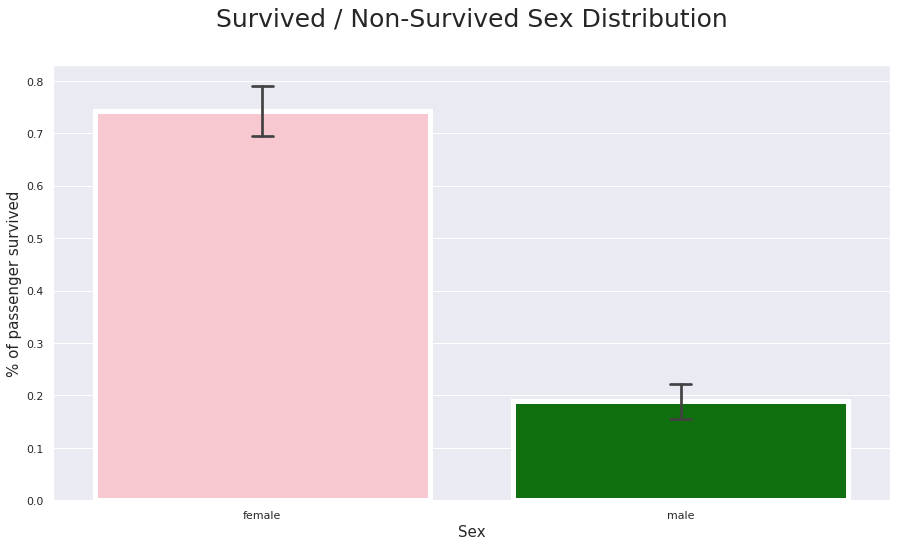

In [28]:
pal = {'male':"green", 'female':"Pink"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "Sex", 
                 y = "Survived", 
                 data=train, 
                 palette = pal,
                 linewidth=5,
                 order = ['female','male'],
                 capsize = .05,

                )

plt.title("Survived / Non-Survived Sex Distribution", fontsize = 25,loc = 'center', pad = 40)
plt.ylabel("% of passenger survived", fontsize = 15, )
plt.xlabel("Sex",fontsize = 15);

#### This bar plot above shows the distribution of female and male survived. The x_label represents Sex feature while the y_label represents the % of passenger survived. This bar plot shows that ~74% female passenger survived while only ~19% male passenger survived.

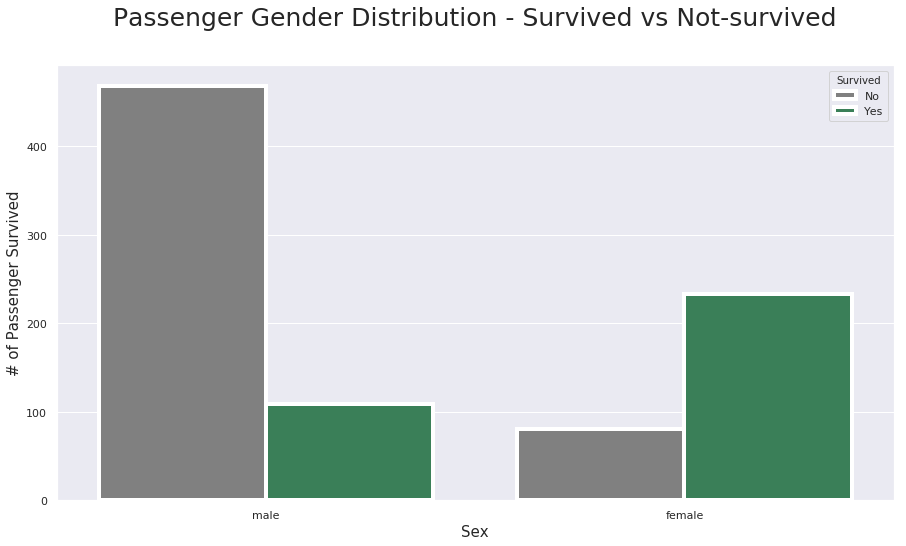

In [29]:
pal = {1:"seagreen", 0:"gray"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.countplot(x = "Sex", 
                   hue="Survived",
                   data = train, 
                   linewidth=4, 
                   palette = pal
)

## Fixing title, xlabel and ylabel
plt.title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 25, pad=40)
plt.xlabel("Sex", fontsize = 15);
plt.ylabel("# of Passenger Survived", fontsize = 15)

## Fixing xticks
#labels = ['Female', 'Male']
#plt.xticks(sorted(train.Sex.unique()), labels)

## Fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

##### This count plot shows the actual distribution of male and female passengers that survived and did not survive. It shows that among all the females ~ 230 survived and ~ 70 did not survive. While among male passengers ~110 survived and ~480 did not survive.


#### $\bullet$ As we suspected, female passengers have survived at a much better rate than male passengers.
#### $\bullet$  It seems about right since females and children were the priority.

###  Pclass and Survived

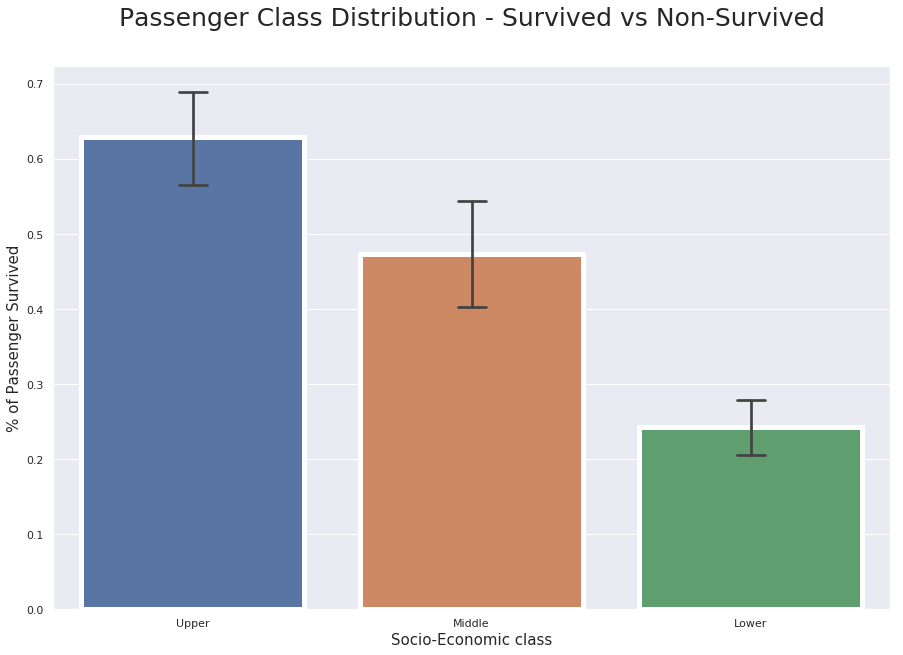

In [32]:
plt.subplots(figsize = (15,10))
sns.barplot(x = "Pclass", 
            y = "Survived", 
            data=train, 
            linewidth=5,
            capsize = .1

           )
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25, pad=40)
plt.xlabel("Socio-Economic class", fontsize = 15);
plt.ylabel("% of Passenger Survived", fontsize = 15);
labels = ['Upper', 'Middle', 'Lower']
#val = sorted(train.Pclass.unique())
val = [0,1,2] ## this is just a temporary trick to get the label right. 
plt.xticks(val, labels);

#### $\bullet$ It looks like ...
   $\bullet$ 63% first class passenger survived titanic tragedy, while <br>
   $\bullet$ 48% second class and <br>
   $\bullet$ only 24% third class passenger survived.<br>

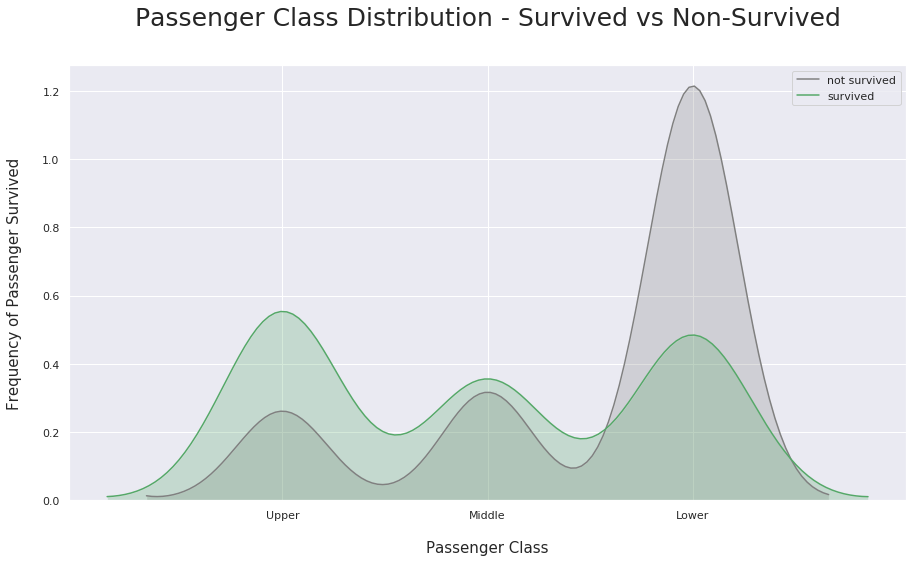

In [33]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
## I have included to different ways to code a plot below, choose the one that suites you. 
ax=sns.kdeplot(train.Pclass[train.Survived == 0] , 
               color='gray',
               shade=True,
               label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'] , 
               color='g',
               shade=True, 
               label='survived', 
              )
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Passenger Class", fontsize = 15,labelpad =20)
## Converting xticks into words for better understanding
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(train.Pclass.unique()), labels);

#### This KDE plot is pretty self-explanatory with all the labels and colors. Something I have noticed that some readers might find questionable is that the lower class passengers have survived more than second-class passengers. It is true since there were a lot more third-class passengers than first and second.

#### The first class passengers had the upper hand during the tragedy than second and third. You can probably agree with me more on this, in the next section of visualizations where we look at the distribution of ticket fare and survived column.

In [35]:
train[train.Fare > 280]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
258,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,B,C,1
679,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B,C,1
737,738,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B,C,1


#### As we assumed, it looks like an outlier with a fare of $512. We sure can delete this point. However, we will keep it for now.

####  Statistical Overview

In [67]:
train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [68]:
train[['Pclass', 'Survived']].groupby("Pclass").mean().reset_index()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


####  We can see very clearly for difference of mean between classes

In [69]:
survived_summary = train.groupby("Sex")
survived_summary.mean().reset_index()

,Sex,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
0,female,431.028662,2.159236,27.915709,0.694268,0.649682,44.479818,0.742038
1,male,454.147314,2.389948,30.726645,0.429809,0.235702,25.523893,0.188908


In [70]:
 train.groupby('Pclass')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


### Above table give us the following conclusions

#### $\bullet$  There is significant  difference  of how much the people have paid depends on of which class they have belong
#### $\bullet$ The standard deviation shows that in class 1 there are big difference of  how much people are rich comparing between them, otherwise in class B there are not so big difference

#### let's to see fare distribution separated by class

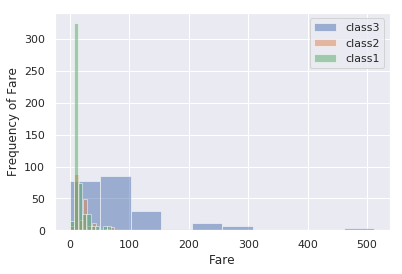

In [78]:
fare_class1 =  train[train['Pclass']==1]['Fare']
fare_class2 =  train[train['Pclass']==2]['Fare']
fare_class3 =  train[train['Pclass']==3]['Fare']

plt.hist(fare_class1,alpha=0.5,label='class3')
plt.hist(fare_class2,alpha=0.5,label='class2')
plt.hist(fare_class3,alpha=0.5,label='class1')
plt.xlabel('Fare')
plt.ylabel('Frequency of Fare')
plt.legend()

### let's to examine fare and survived

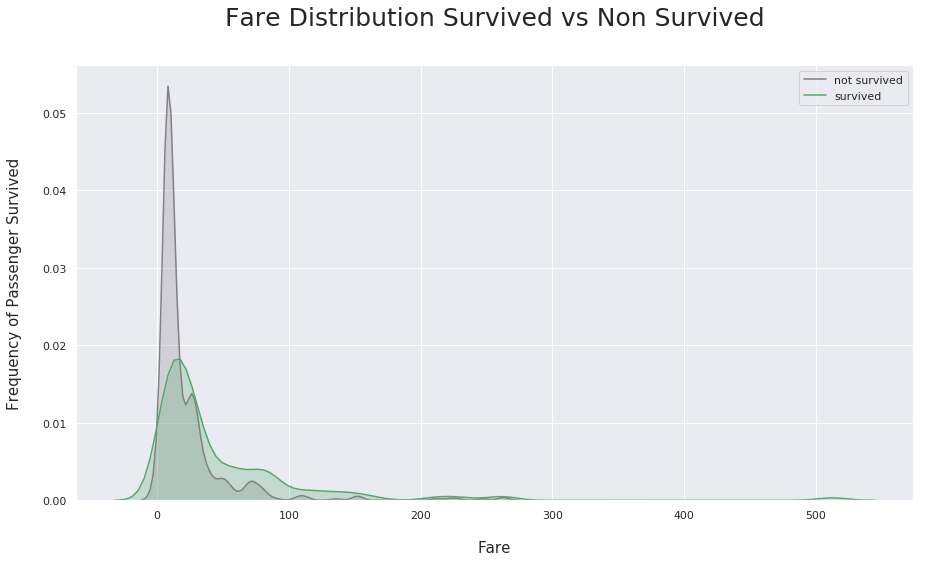

In [80]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'] , color='g',shade=True, label='survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Fare", fontsize = 15, labelpad = 20);

This plot shows something impressive..

The spike in the plot under 100 dollar represents that a lot of passengers who bought the ticket within that range did not survive.
When fare is approximately more than 280 dollars, there is no gray shade which means, either everyone passed that fare point survived or maybe there is an outlier that clouds our judgment. Let's check...

### Hypothesis Testing

#### We will examine :Are there relation between the passengers's surviving and their financial state 

####  Let's to see fist independet t-test between survived and non survided people by their fare

48.39540760233917
22.117886885245877


(array([421.,  83.,  25.,   6.,   4.,   4.,   0.,   0.,   3.,   3.]),
 array([  0. ,  26.3,  52.6,  78.9, 105.2, 131.5, 157.8, 184.1, 210.4,
        236.7, 263. ]),
 <a list of 10 Patch objects>)

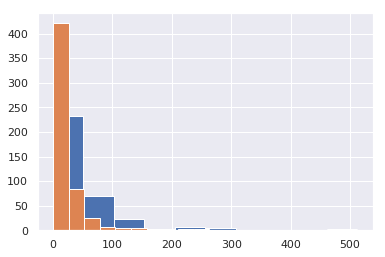

In [85]:
survived_fare = train[(train['Survived']==1) ]['Fare']
non_survived_fare = train[(train['Survived']==0)]['Fare']
print(survived_fare.mean())
print(non_survived_fare.mean())
plt.hist(survived_fare)
plt.hist(non_survived_fare)

In [86]:
stats.ttest_ind(survived_fare,non_survived_fare)

Ttest_indResult(statistic=7.939191660871055, pvalue=6.120189341924198e-15)

#### p <<0.05
#### The  null hypothesis( H0 ) can be rejected
#### this bring sense that the people with more money have more chance to survive

#### Let's to examine p value by class 

#### Class 1 t-test

In [89]:
survived_fare = train[(train['Survived']==1) & (train['Pclass']==1)]['Fare']
non_survived_fare = train[(train['Survived']==0) & (train['Pclass']==1)]['Fare']
stats.ttest_ind(survived_fare,non_survived_fare)

Ttest_indResult(statistic=2.8459733808023455, pvalue=0.004858011186235559)

for class 1 p<<0.05 p=0.004

#### Class 2 t-test

In [95]:
survived_fare = train[(train['Survived']==1) & (train['Pclass']==2)]['Fare']
non_survived_fare = train[(train['Survived']==0) & (train['Pclass']==2)]['Fare']
stats.ttest_ind(survived_fare,non_survived_fare)

Ttest_indResult(statistic=1.3370860606085035, pvalue=0.1828633314873588)

#### for the classes 1,2 the null hypothesis also can be rejected,otherwise for people of class 1 the  p value is one percent greater than p value of class 2 that shows the people with less money on Titanic had less chance to survived


In [121]:
survived_fare = train[(train['Survived']==1) & (train['Pclass']==3)]['Fare']
non_survived_fare = train[(train['Survived']==0) & (train['Pclass']==3)]['Fare']
stats.ttest_ind(survived_fare,non_survived_fare)

Ttest_indResult(statistic=0.02055503589221969, pvalue=0.9836089933973875)

##### p = 0.9
##### For class 3 The null hypothesis( H0 ) is something that is assumed to be true.
##### from above discusion we saw  in class 3 there is not significian difference between  people's financianal ability,this lead us to conclusion that in 3 class the pessengers's surviving depends on more something other than money


### Conslucion
####  We saw that,In class A has big difference how much the people are rich and that is significian related with the chance to survived.In class 3 where the people are approximatly same rich,and  significantly smaller rich than class A,their chance to survive did not depends on money

### References

[1] https://www.kaggle.com/masumrumi/a-statistical-analysis-ml-workflow-of-titanic <br>
[2] https://www.kaggle.com/headsortails/pytanic <br>
[3] https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f <br>   